<a href="https://colab.research.google.com/github/the-menna-sherif/Refreshing_ML_Muscle_Memory/blob/main/Intermediate_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Kaggle courses

This notebook will contain the exercises learnt from the path of the below courses:

1. Intro to *Deep Learning*
2. Intro to *Game AI & Reinforcement Learning*

# Intro to Deep Learning

In [16]:
import pandas as pd

red_wine = pd.read_csv("/content/winequality-red.csv")
print("Dataset shape: ", red_wine.shape, "\nHead:")
red_wine.head()

Dataset shape:  (1599, 12) 
Head:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Binary Classfxn

I am adding a binary column, to continue my practice on this dataset.

In [23]:
red_wine['quality_binary'] = (red_wine['quality'] > 5).astype(int)
red_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [ ]:
# Deepen neural network with activation fxns & more dense layers

deep_neural_network_1 = keras.Sequential([
    keras.Input(shape=(red_wine.shape[1] - 1,)),
    # Hidden ReLU layers
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=3, activation='relu'),
    # linear output layer (no actvtn, good for regression- bad for classification)
    layers.Dense(units=1)
])

# Stochastic Gradient Descent

In [2]:
from IPython.display import display
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
print(X_train.shape)

(1119, 11)


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

SGD_model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

SGD_model.compile(optimizer='adam',
                  loss='mae')

history_sgd = SGD_model.fit(X_train, y_train,
                            validation_data=(X_valid, y_valid),
                            batch_size=256,
                            epochs=10
                            )

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.3773 - val_loss: 0.1865
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1603 - val_loss: 0.1584
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1428 - val_loss: 0.1226
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1255 - val_loss: 0.1173
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1158 - val_loss: 0.1194
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1146 - val_loss: 0.1070
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1110 - val_loss: 0.1128
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1122 - val_loss: 0.1045
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1059 - val_loss: 0.1059
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1031 - val_loss: 0.1012


In [4]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history_sgd.history)
# use Pandas native plot method
history_df['loss'].plot();

NameError: name 'history_sgd' is not defined

# Overfitting & Underfitting
Here we use the learning curve (epochs vs. loss) to determine the best values for epochs to avoid over/ under fitting. We use:
- **Network capacity** (depth and breadth)
- **Early Stopping** (using Callbacks)

Minimum validation loss: 0.10120667517185211


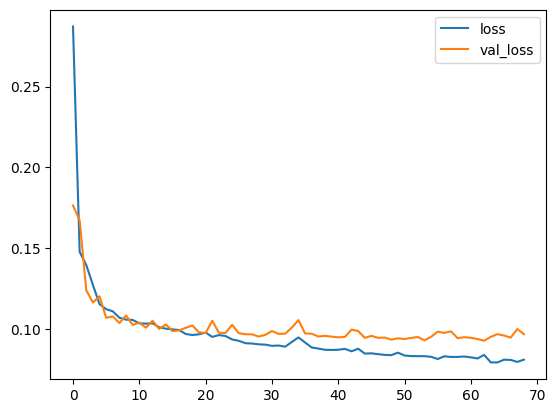

In [17]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001 ,
    patience=20 ,
    restore_best_weights=True
)

fitting_model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

fitting_model.compile(
    optimizer='adam',
    loss='mae',
)

history_fitting = fitting_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=False
)

history_fitting_df = pd.DataFrame(history_fitting.history)
history_fitting_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


# Dropout

Minimum validation loss: 0.10120667517185211


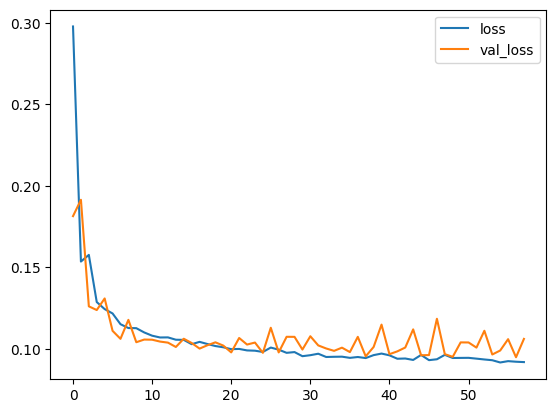

In [19]:
from tensorflow import keras
from keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001 ,
    patience=20 ,
    restore_best_weights=True
)

dropper_model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

dropper_model.compile(
    optimizer='adam',
    loss='mae',
)

history_dropper = dropper_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=False,
    )

history_dropper_df = pd.DataFrame(history_dropper.history)
history_dropper_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Batch Normalization

Minimum validation loss: 0.10109994560480118


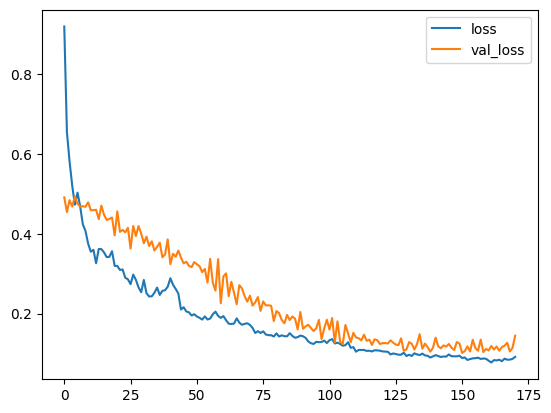

In [6]:
from tensorflow import keras
from keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001 ,
    patience=20 ,
    restore_best_weights=True
)

BN_dropper_model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

BN_dropper_model.compile(
    optimizer='adam',
    loss='mae',
)

history_BN_dropper = BN_dropper_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=False,
    )

history_BN_dropper_df = pd.DataFrame(history_BN_dropper.history)
history_BN_dropper_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_BN_dropper_df['val_loss'].min()))

# Binary Classfxn

Prepping datasets for binary classification

In [24]:
from IPython.display import display
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train_bin = df_train.drop('quality_binary', axis=1)
X_valid_bin = df_valid.drop('quality_binary', axis=1)
y_train_bin = df_train['quality_binary']
y_valid_bin = df_valid['quality_binary']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6,1
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5,0
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,1
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6,1


In [30]:
from re import VERBOSE
bin_model = keras.Sequential([
    layers.Input(shape=[X_train_bin.shape[1]]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

bin_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001 ,
    patience=20 ,
    restore_best_weights=True
)

bin_history = bin_model.fit(
    X_train_bin, y_train_bin,
    validation_data=(X_valid_bin, y_valid_bin),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=False
)

Best Validation Loss: 0.0100
Best Validation Accuracy: 1.0000


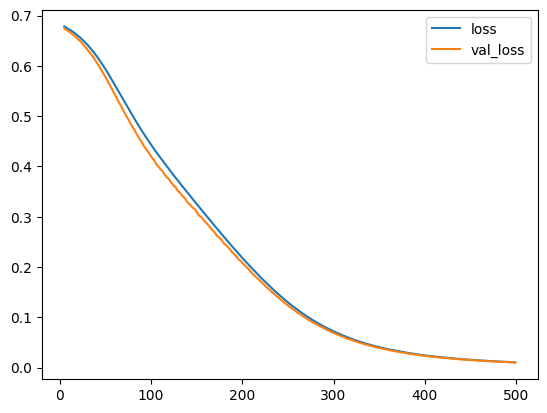

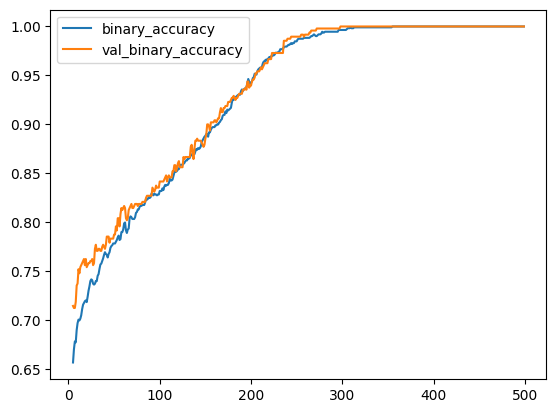

In [31]:
bin_history_df = pd.DataFrame(bin_history.history)
# Start the plot at epoch 5
bin_history_df.loc[5:, ['loss', 'val_loss']].plot()
bin_history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(bin_history_df['val_loss'].min(),
              bin_history_df['val_binary_accuracy'].max()))